Two types of prompt - Text based prompts and Multimodal prompts (audio, image, video). Focus is on Text based prompts

In [1]:
!pip install langchain_community
!pip install langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00


In [2]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


In [3]:
from pyngrok import ngrok
!ngrok config add-authtoken <YOUR_AUTH_KEY>

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile staticprompt.py
from langchain_huggingface import HuggingFacePipeline, ChatHuggingFace
import streamlit as st
llm = llm = HuggingFacePipeline.from_model_id(
        model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
        task = "text-generation"
    )
model = ChatHuggingFace(llm=llm)
st.header("Research Tool")
user_input = st.text_input("Enter your prompt")
if st.button("Summarize"):
    result = model.invoke(user_input)
    st.text(result)

Writing staticprompt.py


In [ ]:
public_url = ngrok.connect(addr=8501)
print(f"Streamlit URL: {public_url}")

Streamlit URL: NgrokTunnel: "https://3a94c20d00a1.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run staticprompt.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.197.205:8501

2025-07-07 20:22:27.253032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751919747.277031     907 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751919747.284270     907 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-07 20:22:27.308072: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebu

In [ ]:
!pkill streamlit

### Above gives the entire control to user and high chances model may hallucinates. This can be overcome by PromptTemplate

In [4]:
!pip install langchain_core

In [5]:
%%writefile dynamicprompt.py
from langchain_huggingface import HuggingFacePipeline, ChatHuggingFace
from langchain_core.prompts import PromptTemplate

import streamlit as st
llm = llm = HuggingFacePipeline.from_model_id(
        model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
        task = "text-generation"
    )
model = ChatHuggingFace(llm=llm)

st.header("Research Tool")

paper_input = st.selectbox("Select Research Paper Name", ["Select...", "Attention is all you need", "Word2Vec", "GPT-3: Language Models are Few-Shot Learners"])
style_input = st.selectbox("Select Explanation Style", ["Beginner Friendly", "Technical", "Code-Oriented", "Mathematical"])
length_input = st.selectbox("Select Explanation Length", ["Short (1-2 paragraphs)", "Medium (3-4 paragraphs)", "Long (detailed explanation)"])


#Template
template = PromptTemplate(
    template = """
    Please summarize the research paper title "{paper_input}" with following specifications:
    Explanation Style: {style_input}
    Explanation Length: {length_input}
    1. Mathematical Details:
    - Include relevant mathematical equations if present in the paper
    - Explain the mathematical concepts using simple and intuitive code snippets where applicable
    If certain information is not available in the paper, respond with :"Insufficient information available" instead of guessing
    Ensure the summary is clear, accurate and aligned with the provided style and length
    """,
    input_variables=['paper_input', 'style_input', 'length_input']
)

prompt = template.invoke({
        'paper_input': paper_input,
        'style_input': style_input,
        'length_input': length_input
    })

if st.button("Summarize"):
    result = model.invoke(prompt)
    st.write(result)


Writing dynamicprompt.py


In [6]:
public_url = ngrok.connect(addr=8501)
print(f"Streamlit URL: {public_url}")

Streamlit URL: NgrokTunnel: "https://8b2c12fc16d2.ngrok-free.app" -> "http://localhost:8501"


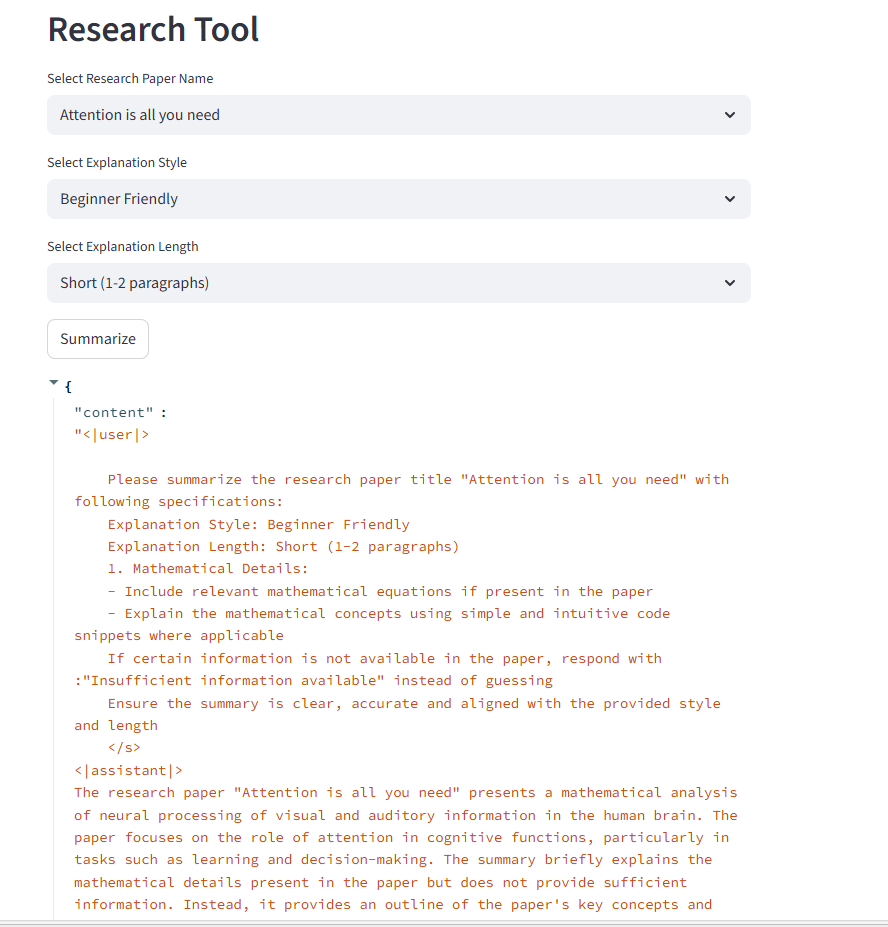

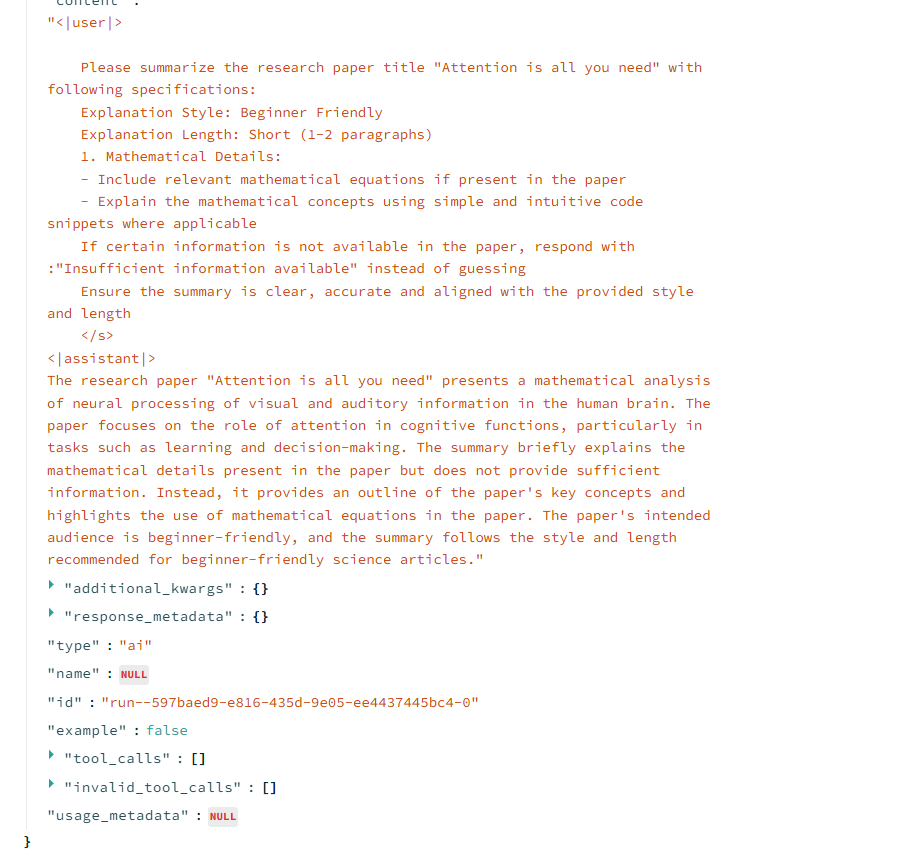

In [7]:

!streamlit run dynamicprompt.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.240.235.241:8501

2025-07-08 04:21:16.030588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751948476.053079    4417 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751948476.060226    4417 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-08 04:21:16.082988: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operatio

In [8]:
!kill streamlit

/bin/bash: line 1: kill: streamlit: arguments must be process or job IDs


##Reusable Prompts

In [10]:
%%writefile prompt_generator.py
from langchain_core.prompts import PromptTemplate

#Template
template = PromptTemplate(
    template = """
    Please summarize the research paper title "{paper_input}" with following specifications:
    Explanation Style: {style_input}
    Explanation Length: {length_input}
    1. Mathematical Details:
    - Include relevant mathematical equations if present in the paper
    - Explain the mathematical concepts using simple and intuitive code snippets where applicable
    If certain information is not available in the paper, respond with :"Insufficient information available" instead of guessing
    Ensure the summary is clear, accurate and aligned with the provided style and length
    """,
    input_variables=['paper_input', 'style_input', 'length_input'],
    validate_template=True
)
template.save("template.json")

Writing prompt_generator.py


In [11]:
!python prompt_generator.py

In [12]:
from langchain_huggingface import HuggingFacePipeline, ChatHuggingFace
from langchain_core.prompts import load_prompt
from pprint import pprint

llm = llm = HuggingFacePipeline.from_model_id(
        model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
        task = "text-generation"
    )
model = ChatHuggingFace(llm=llm)

paper_input = "Attention is all you need"
style_input = "Beginner Friendly"
length_input = "Short (1-2 paragraphs)"


#Template
template = load_prompt("/content/template.json")

prompt = template.invoke({
        'paper_input': paper_input,
        'style_input': style_input,
        'length_input': length_input
    })

result = model.invoke(prompt)
pprint(result.content)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


('<|user|>\n'
 '\n'
 '    Please summarize the research paper title "Attention is all you need" '
 'with following specifications:\n'
 '    Explanation Style: Beginner Friendly\n'
 '    Explanation Length: Short (1-2 paragraphs)\n'
 '    1. Mathematical Details:\n'
 '    - Include relevant mathematical equations if present in the paper\n'
 '    - Explain the mathematical concepts using simple and intuitive code '
 'snippets where applicable\n'
 '    If certain information is not available in the paper, respond with '
 ':"Insufficient information available" instead of guessing\n'
 '    Ensure the summary is clear, accurate and aligned with the provided '
 'style and length\n'
 '    </s>\n'
 '<|assistant|>\n'
 'The research paper titled "Attention is All You Need" examines the '
 'significance of attention in human cognition, and the implications of this '
 'insight in various fields such as neuroscience, psychology, and artificial '
 'intelligence. The paper presents mathematical detail